## Loading Essential Libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set pandas display options for better readability of output
from IPython.display import display
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# Set Seaborn aesthetic parameters
sns.set(
    context='notebook',
    style='darkgrid',
    #palette="Blues",
    font='sans-serif',
    font_scale=0.8,
    rc={'figure.figsize': (12, 6)}
)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

In [4]:
# Loading Sales Data file and display top 5 rows
df_path = "/content/drive/MyDrive/Colab Notebooks/MRA/Project A/Sales_Data.xlsx"
df_salesdata = pd.read_excel(df_path,sheet_name=0)
df_salesdata.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10100,30,171.7000,3,5151.0000,2018-01-06,1429,Shipped,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Medium
1,10100,50,67.8000,2,3390.0000,2018-01-06,1529,Shipped,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Medium
2,10100,22,86.5100,4,1903.2200,2018-01-06,2096,Shipped,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Small
3,10100,49,34.4700,1,1689.0300,2018-01-06,2836,Shipped,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Small
4,10101,25,151.2800,4,3782.0000,2018-01-09,1573,Shipped,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,60528,Germany,Keitel,Roland,Medium


## Data Overview

In [5]:
# Display shape of the data
print(f'The dataset has {df_salesdata.shape[0]} rows and {df_salesdata.shape[1]} columns.')

The dataset has 2747 rows and 20 columns.


In [6]:
# Display dataset information
display(df_salesdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

None

**Observations:**
* Dataset has 12 categorical, 7 numerical (5 int64 and 2 float24) and 1 datetime columns.
* Total memory usage is 429.3+ KB

In [7]:
# Dataset Statistics
# Describe numerical fields
numerical_columns = df_salesdata.select_dtypes(include=['number']).columns
relevant_numerical_columns = numerical_columns.difference(['ORDERNUMBER', 'ORDERLINENUMBER'])
numerical_description = df_salesdata[relevant_numerical_columns].describe().T

# Describe categorical fields
categorical_description = df_salesdata.select_dtypes(include=['object']).describe().T

# Describe datetime fields
datetime_columns = df_salesdata.select_dtypes(include=['datetime64']).columns
df_salesdata[datetime_columns] = df_salesdata[datetime_columns].apply(lambda x: x.dt.date)
datetime_description = df_salesdata[datetime_columns].describe().T

# Display the descriptions
display(numerical_description, categorical_description, datetime_description)

,count,mean,std,min,25%,50%,75%,max
DAYS_SINCE_LASTORDER,2747.0000,1757.0859,819.2806,42.0000,1077.0000,1761.0000,2436.5000,3562.0000
MSRP,2747.0000,100.6917,40.1148,33.0000,68.0000,99.0000,124.0000,214.0000
PRICEEACH,2747.0000,101.0990,42.0425,26.8800,68.7450,95.5500,127.1000,252.8700
QUANTITYORDERED,2747.0000,35.1030,9.7621,6.0000,27.0000,35.0000,43.0000,97.0000
SALES,2747.0000,3553.0476,1838.9539,482.1300,2204.3500,3184.8000,4503.0950,14082.8000


,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


,count,unique,top,freq
ORDERDATE,2747,246,2018-11-14,38


In [8]:
# Display count of Unique Orders:
print(f"Total Order Count: {df_salesdata['ORDERNUMBER'].nunique()}.")

Total Order Count: 298.


**Observations**

**Numerical Columns:**
* DAYS_SINCE_LAST_ORDER: Avg 1757 days (4.8 years); wide range indicates potential churn.
* MSRP: Avg \\$100.69, with minimum of \\$33 and maximum of \\$214 reveal diverse product price points.
* PRICEEACH: Closely aligns with MSRP; ranges \\$26.88 to \\$252.87.
* QUANTITYORDERED: Avg 35 units with min of 6 and max of 97; large variability in order sizes.
* SALES: Avg \\$3,553.05; high variability in order values.

**Categorical Columns:**
* STATUS: 92% orders are "Shipped."
* PRODUCTLINE: 7 Unique productlines, "Classic Cars" is the most popular.
* CUSTOMERNAME: 89 customers; Euro Shopping Channel seems to have most orders.
* COUNTRY: Business in 19 countries; USA leads with 928 records.
* DEALSIZE: "Small", "Medium" and "Large"; "Medium" is the most common deal size.

**Datetime Columns:**
* ORDERDATE: Dates ranges form 2018 till 2020; 2018-11-14 had a peak of 38 orders.

**Unique Order Count: 298**

In [9]:
# Check for missing values
df_salesdata.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


**Observation**
* There are no missing values in the dataset.

In [10]:
# Check for Duplicates
df_salesdata.duplicated().sum()

0

**Observation:**
* No duplicate values found in the dataset.

## Exploratory Data Analysis
**Univariate Analysis:**
* Numerical Columns
* Categorical Columns

**Bivariate Analysis:**
* Numerical to Numerical Columns
* Categorical to Numerical Columns
* Categorical to Categorical Columns

**Time-Series Analysis**

**Bivariate Analysis - Customers**

**EDA Summary and Key Findings**

#### Functions to assist in EDA

In [11]:
# Displays a boxplot and a histogram along the same scale.
def histogram_boxplot_grid(data):
    """
    Grid of boxplots and histograms for each feature in the dataset.
    Each feature's boxplot is followed by its histogram in the next row.
    Maximum three features per row.
    data: dataset
    """
    features = data.columns  # Select columns to be plotted
    ncols = 2  # Maximum of three features per row
    nfeatures = len(features)
    nrows = 2 * (nfeatures // ncols + (nfeatures % ncols > 0))  # Two rows per feature set

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4 * nrows),
                             gridspec_kw={'height_ratios': [1, 3] * (nrows // 2)})

    for i, feature in enumerate(features):
        # Calculate row for boxplot and histogram
        row_box = 2 * (i // ncols)
        row_hist = row_box + 1
        col = i % ncols

        # Plot boxplot
        sns.boxplot(data=data, x=feature, ax=axes[row_box, col], showmeans=True)
        axes[row_box, col].set_title(f'Boxplot of {feature}', fontsize=17)
        axes[row_box, col].set_xticks([])  # Hide x-ticks for cleanliness

        # Plot histogram below the boxplot
        sns.histplot(data=data, x=feature, kde=False, ax=axes[row_hist, col])
        axes[row_hist, col].set_title(f'Histogram of {feature}', fontsize=17)
        axes[row_hist, col].axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
        axes[row_hist, col].axvline(data[feature].median(), color="black", linestyle="-", label="Median")
        axes[row_hist, col].legend()

    plt.tight_layout()
    plt.show()

# Display bar plots for categorical features
def plot_categorical_bars(data):
    """
    Plots bar plots for all categorical columns in the DataFrame.

    Parameters:
        data (DataFrame): The pandas DataFrame containing the data.
    """
    # Identify categorical columns: Either by dtype 'object' or by checking the number of unique values
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object' or data[col].nunique() < 10]

    # Set the number of columns for subplot grid
    ncols = 2 if len(categorical_columns) > 2 else len(categorical_columns)
    nrows = (len(categorical_columns) + ncols - 1) // ncols  # Calculate the number of rows needed

    # Set dynamic width of the figure based on the number of columns
    fig_width = 5 * ncols  # Each subplot approx 5 inches wide
    fig_height = 5 * nrows  # Each subplot approx 5 inches tall

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_width, fig_height))
    axes = axes.flatten() if nrows > 1 or ncols > 1 else [axes]  # Handle the case of a single subplot

    # Loop over the categorical columns and create a bar plot for each
    for i, col in enumerate(categorical_columns):
        sns.countplot(x=col, data=data, ax=axes[i])
        axes[i].set_title(f'Bar Plot of {col}', fontsize=17)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Display bar plots to customer count by selected fields
def plot_customer_counts(df, columns):
    """
    Plots the count of unique customers for each column in the provided list.

    Parameters:
    df (DataFrame): The data frame containing customer data.
    columns (list): List of column names to plot.

    Returns:
    None: Displays the plot.
    """
    # Determine the number of plots based on the columns list
    num_plots = len(columns)

    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        if i < num_plots:
            customer_counts = df.groupby(col)['CUSTOMERNAME'].nunique()
            customer_counts.plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'Customer Count by {col}', fontsize=17)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Number of Customers')
            axes[i].tick_params(axis='x', rotation=45)
        else:
            fig.delaxes(axes[i])  # Remove unused subplots

    plt.tight_layout()
    plt.show()

### Univariate Analysis - Numerical Columns

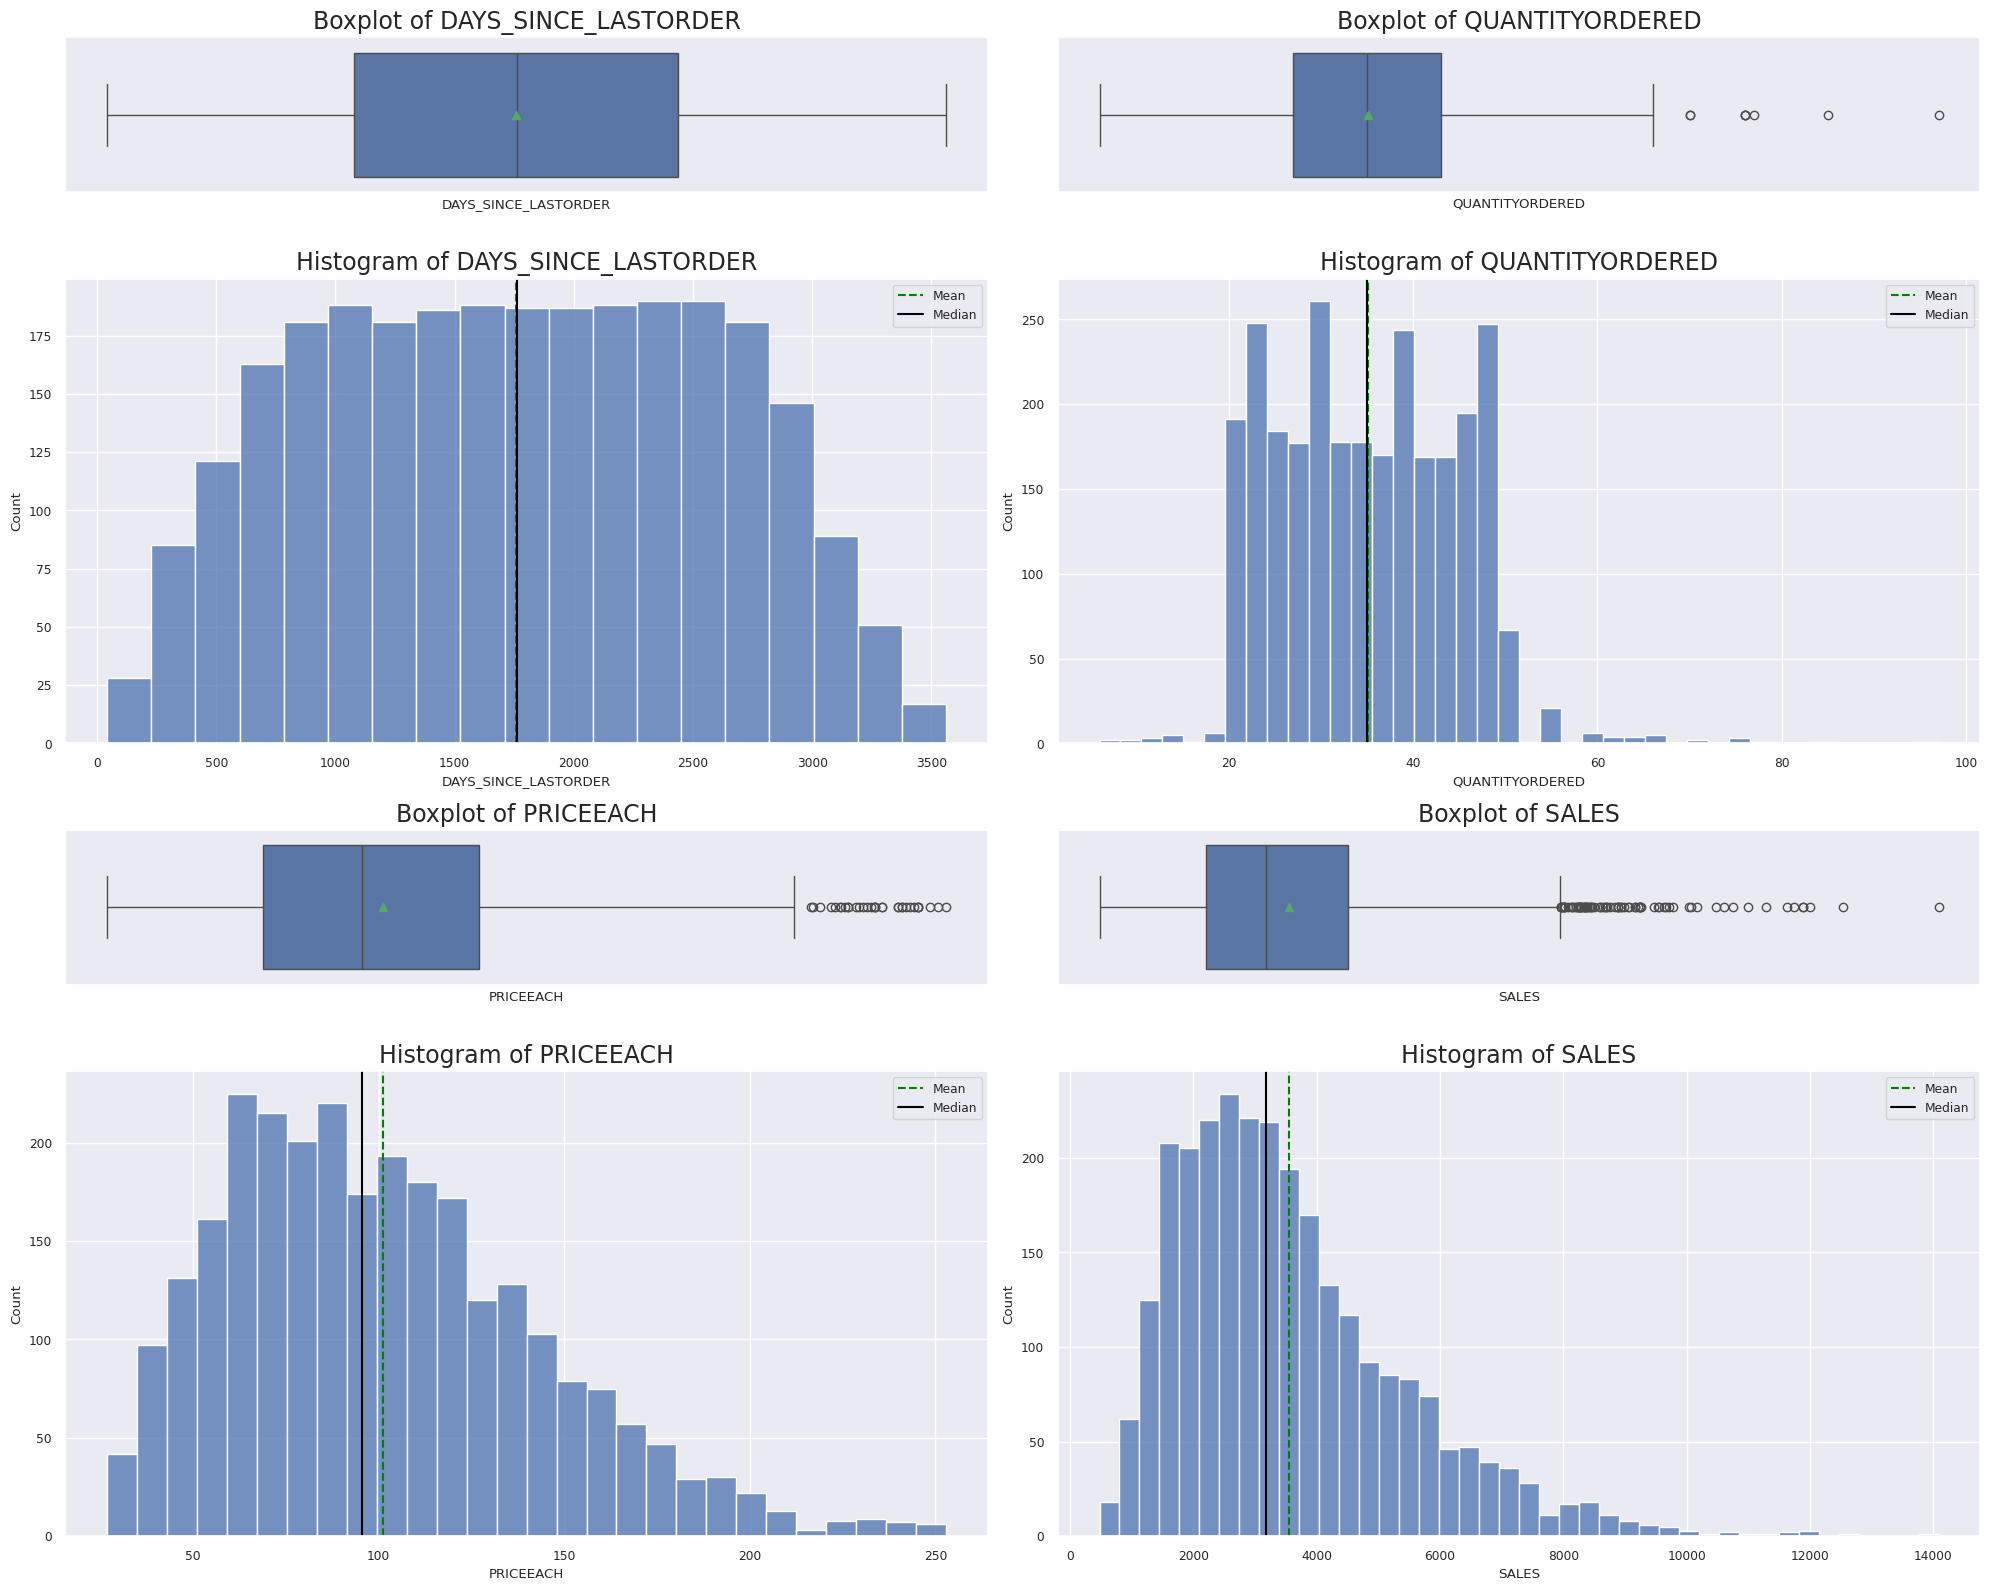

,count,mean,std,min,25%,50%,75%,max
DAYS_SINCE_LASTORDER,2747.0000,1757.0859,819.2806,42.0000,1077.0000,1761.0000,2436.5000,3562.0000
QUANTITYORDERED,2747.0000,35.1030,9.7621,6.0000,27.0000,35.0000,43.0000,97.0000
PRICEEACH,2747.0000,101.0990,42.0425,26.8800,68.7450,95.5500,127.1000,252.8700
SALES,2747.0000,3553.0476,1838.9539,482.1300,2204.3500,3184.8000,4503.0950,14082.8000


In [12]:
# Boxplots and Histograms for selected numerical columns
numerical_columns_for_uva = df_salesdata[['DAYS_SINCE_LASTORDER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES']]
histogram_boxplot_grid(numerical_columns_for_uva)

# Summary statistics
display(numerical_columns_for_uva.describe().T)

#### **Obsevations on Numerical Features:**

**DAYS_SINCE_LASTORDER**
* 1,139 unique, Range: 42-3,562 days, Mean: 1,757 days, Median: 1,761 days
* Long gaps between orders suggest potential churn risk.

**PRICEEACH**
* 276 unique, Range: \$26.8 and \$252.87, Mean: \$101.10, Median: \$95.55
* Pricing closely follows MSRP, indicating consistent pricing strategies.

**QUANTITYORDERED**
* 82 unique, Range: 6-97 units, Mean: 35 units, Median: 35 units
* Orders typically cluster around 35 units, showing moderate order sizes.

**SALES**
* 2,182 unique, Range: \$482.13-\$14,082.80, Mean: \$3,553.05, Median: \$3,184.80
* High variability in sales, with both moderate and high-value transactions contributing to revenue.

### Univariate Analysis - Categorical Columns

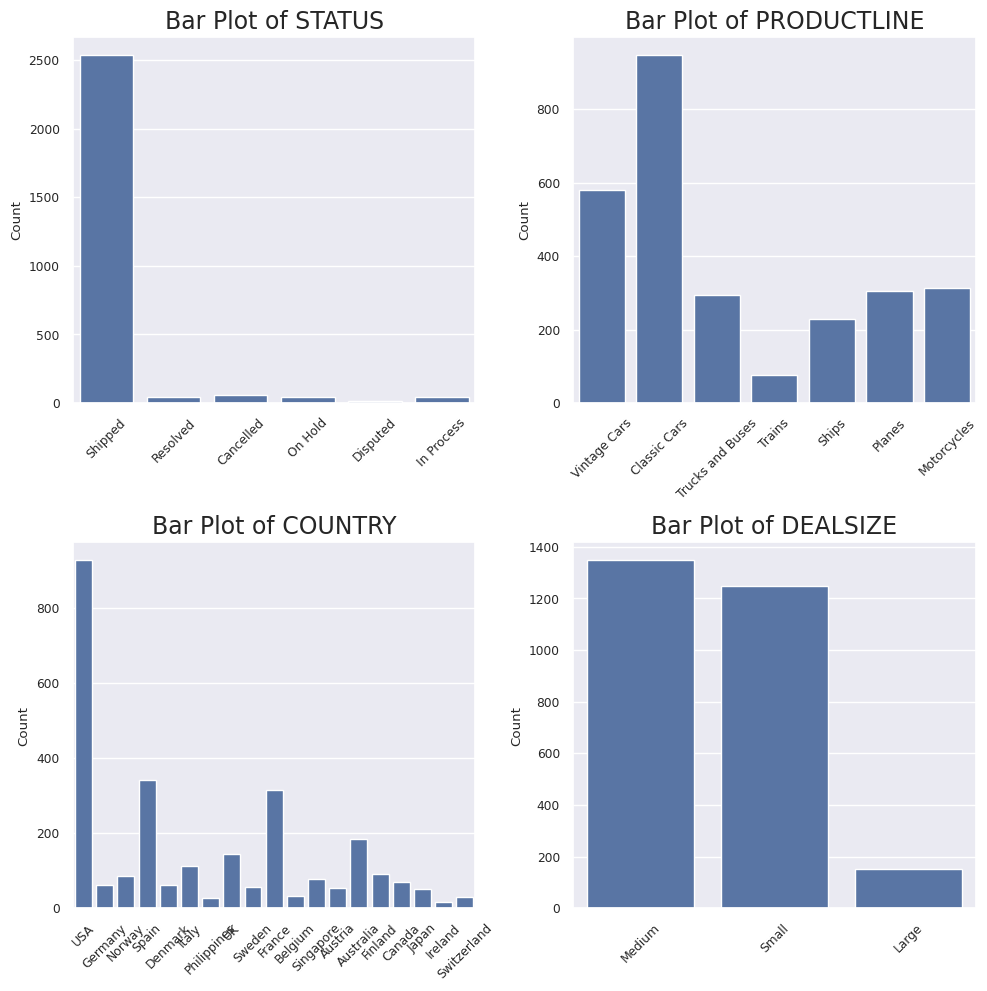

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
COUNTRY,2747,19,USA,928
DEALSIZE,2747,3,Medium,1349


In [13]:
# Bar plots for selected categorical columns
categorical_columns_for_uva = df_salesdata[['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']]
plot_categorical_bars(categorical_columns_for_uva)

# Summary statistics
display(categorical_columns_for_uva.describe().T)

#### **Observations on Categorical Features**

**STATUS**

* 6 Unique values - Shipped, Cancelled, On Hold, Disputed, In Process, and Resolved
* 92.5% of orders are with Status Shipped, indicating a high rate of order completion.
* The majority of orders are successfully completed, indicating efficient order fulfillment.

**PRODUCTLINE**

* 7 unique values - Classic Cars, Motorcycles, Planes, Ships, Trains, Trucks and Buses & Vintage Cars.
* 'Classic Cars' is the top product line with 34.5% of order share and likely a key revenue driver.
* Less frequent product lines like 'Trains' and 'Ships' may represent niche markets or opportunities for targeted marketing.

**COUNTRY**

* 19 unique values e.g., USA, Germany, France, UK, Spain etc.
* The USA is the largest market, with a third of all orders.
* Significant presence in Europe (Germany, France, UK), indicating strong international operations.
* Potential growth opportunities in less represented regions.

**DEALSIZE**

* 3 unique values, Small, Medium and Large.
* Medium-sized deals dominate with 49.1% od orders, indicating a balanced approach between high-volume and high-value transactions.
* Small deals are significant, suggesting a healthy volume of lower-value transactions, likely contributing to steady revenue.
* Large deals, while less frequent, could be crucial for high revenue spikes.

### Bivariate Analysis - Numerical to Numerical

#### Order Quantity and Sales

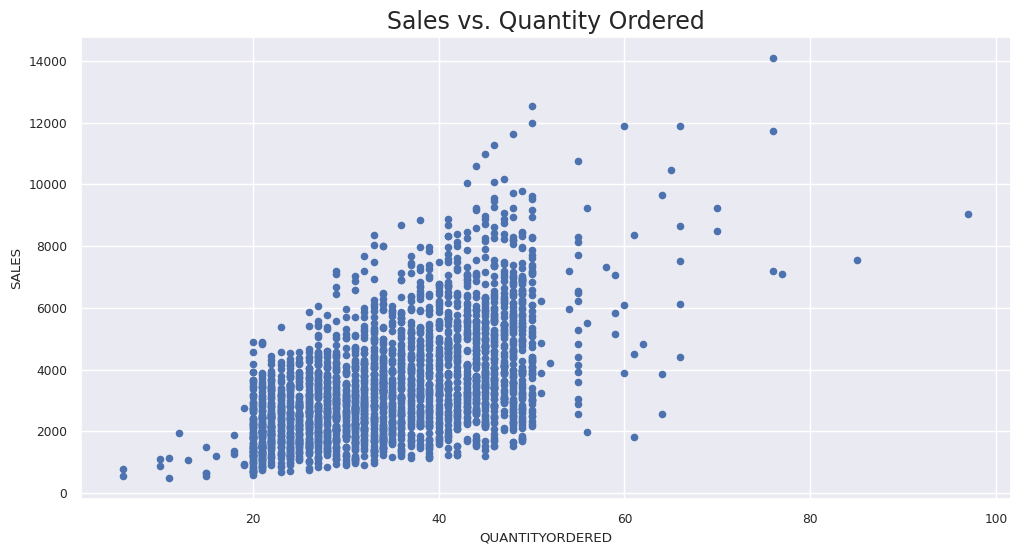

Correlation between Sales and Quantity Ordered: 0.5533586729689348


In [14]:
# Scatter plot to find correlation between Quantity Ordered and Sales
df_salesdata.plot.scatter(x='QUANTITYORDERED', y='SALES')
plt.title('Sales vs. Quantity Ordered', fontsize=17)
plt.show()

# Correlation coefficient
correlation_sales_quantity = df_salesdata['QUANTITYORDERED'].corr(df_salesdata['SALES'])
print(f'Correlation between Sales and Quantity Ordered: {correlation_sales_quantity}')

**Observations:**
* Positive correlation—more units ordered generally lead to higher sales.
* Variability suggests PRICEEACH influences sales for similar quantities.

#### Days Since Last Order vs. Monetary Value (Sales)

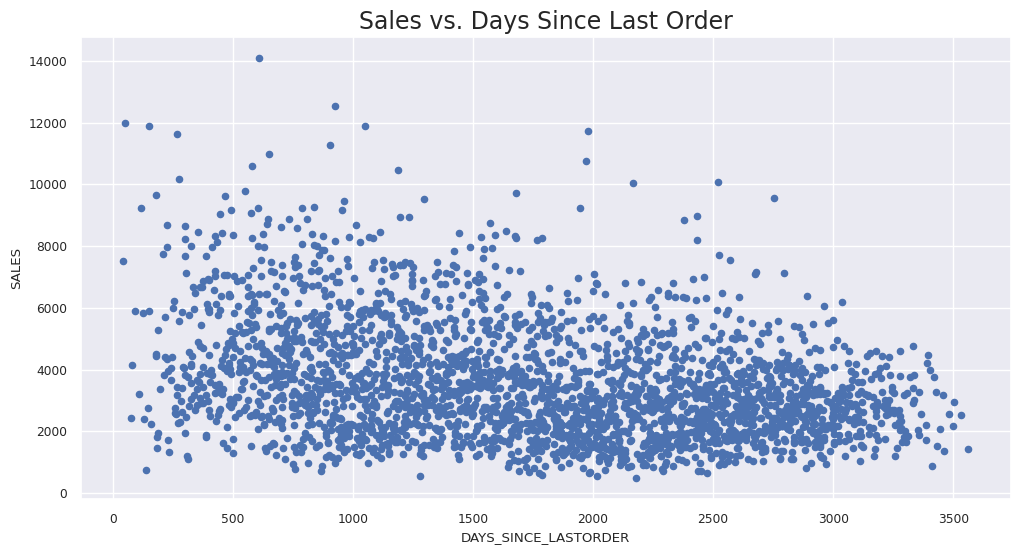

Correlation between Days Since Last Order and Sales: -0.3342743593102182


In [15]:
# Scatter plot to find correlation between Days since last order and Sales
df_salesdata.plot.scatter(x='DAYS_SINCE_LASTORDER', y='SALES')
plt.title('Sales vs. Days Since Last Order', fontsize=17)
plt.show()

# Correlation coefficient
correlation_days_sales = df_salesdata['DAYS_SINCE_LASTORDER'].corr(df_salesdata['SALES'])
print(f'Correlation between Days Since Last Order and Sales: {correlation_days_sales}')

**Observations:**
* No strong correlation—sales occur across all ranges of days since the last order.
* High sales cluster for long gaps, indicating some high-value customers purchase infrequently.

### Bivariate Analysis - Categorical to Numerical

#### Product Line vs. Sales

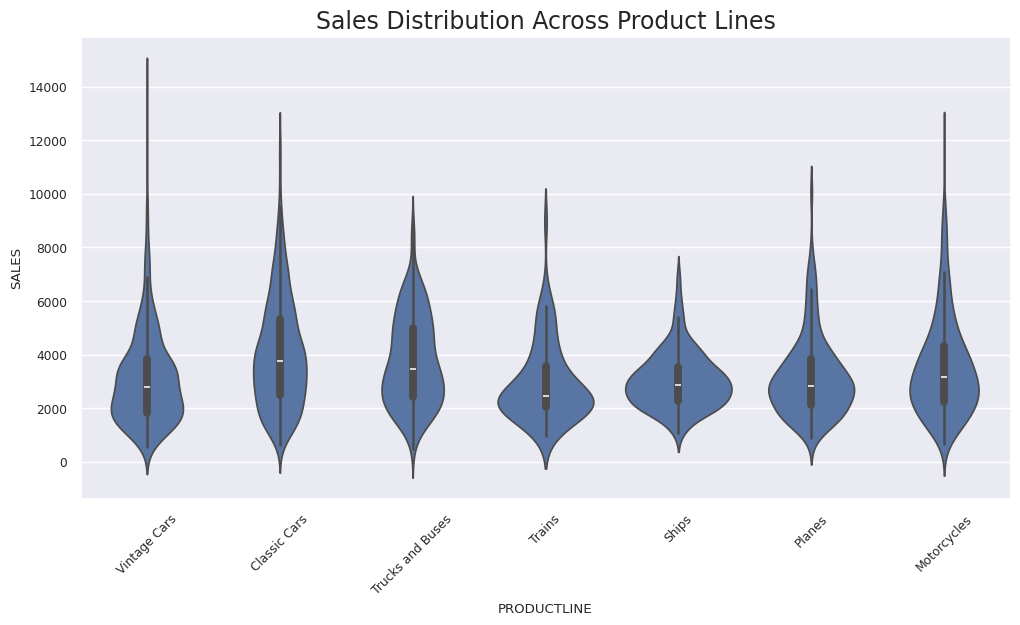

In [16]:
# Violin plot to compare the distribution of sales across different product lines.
sns.violinplot(x='PRODUCTLINE', y='SALES', data=df_salesdata)
plt.title('Sales Distribution Across Product Lines', fontsize=17)
plt.xticks(rotation=45)
plt.show()

**Observations:**
* Classic Cars and Vintage Cars generate the highest sales, indicating they are key revenue drivers.
* Other product lines like Trains and Ships show lower sales, suggesting niche markets with potential for targeted growth.

#### Deal Size vs. Sales

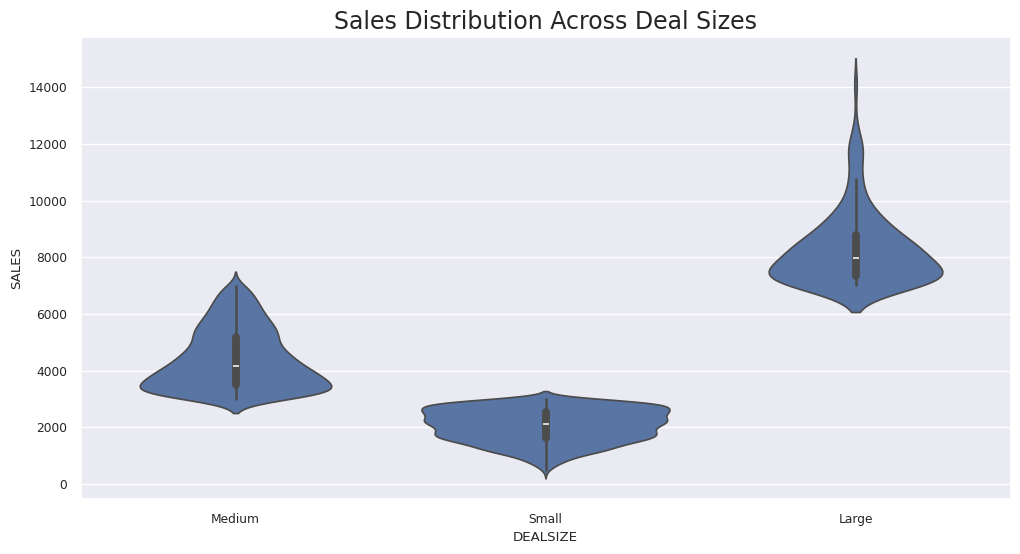

In [17]:
# Violin plot showing Sales distribution by Deal Size
sns.violinplot(x='DEALSIZE', y='SALES', data=df_salesdata)
plt.title('Sales Distribution Across Deal Sizes', fontsize=17)
plt.show()

**Observations:**
* Large deals contribute significantly more to total sales compared to Small and Medium deals, reflecting the importance of high-value transactions.
* The wide sales distribution within Large deals indicates variability in high-value customer purchases.

### Bivariate Analysis - Categorical to Categorical

#### Product Line vs. Deal Size

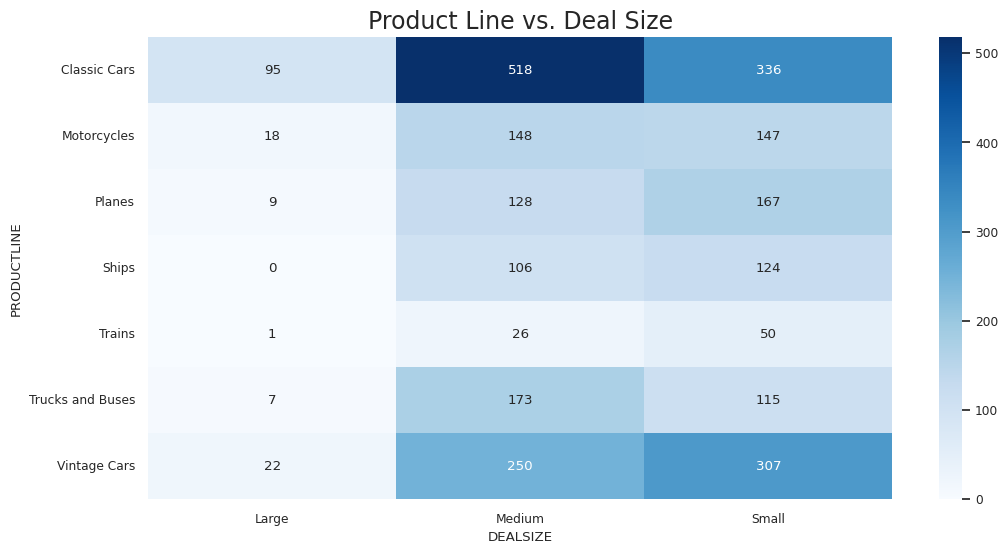

In [18]:
# Cross tabulation and Heatmap to show correlation between Product Lines and Deal Size

# Cross Tabulation
crosstab_productline_dealsize = pd.crosstab(df_salesdata['PRODUCTLINE'], df_salesdata['DEALSIZE'])

# Plotting Heatmap
sns.heatmap(crosstab_productline_dealsize, annot=True, cmap='Blues', fmt='.0f')
plt.title('Product Line vs. Deal Size', fontsize=17)
plt.show()

**Observations:**
* Classic Cars dominate across all deal sizes, especially in Medium deals, emphasizing their broad market appeal.
* Product lines like Trains are more common in Small deals, indicating they are less likely to be sold in bulk.

#### Country vs. Status

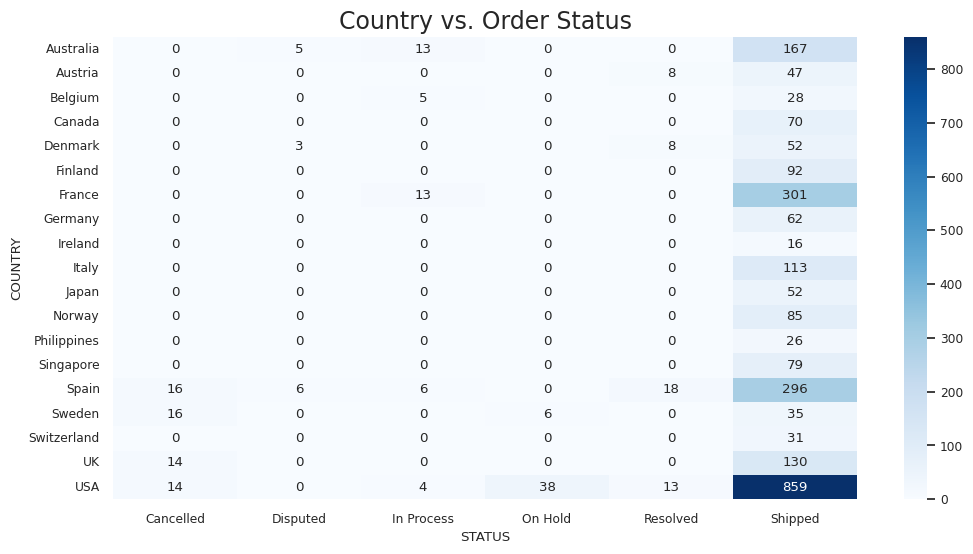

In [19]:
# Cross tabulation and Heatmap to show correlation between Countries and Order Status

# Cross Tabulation
crosstab_country_status = pd.crosstab(df_salesdata['COUNTRY'], df_salesdata['STATUS'])

# Plotting Heatmap
sns.heatmap(crosstab_country_status, annot=True, cmap='Blues', fmt='.0f')
plt.title('Country vs. Order Status', fontsize=17)
plt.show()

**Observations:**
* Most orders are Shipped and the USA has the highest number of Shipped orders, reinforcing its position as the largest market.
* Sweden shows a high percentage of Cancelled orders, which may indicate regional operational challenges.

### Time-Series Analysis

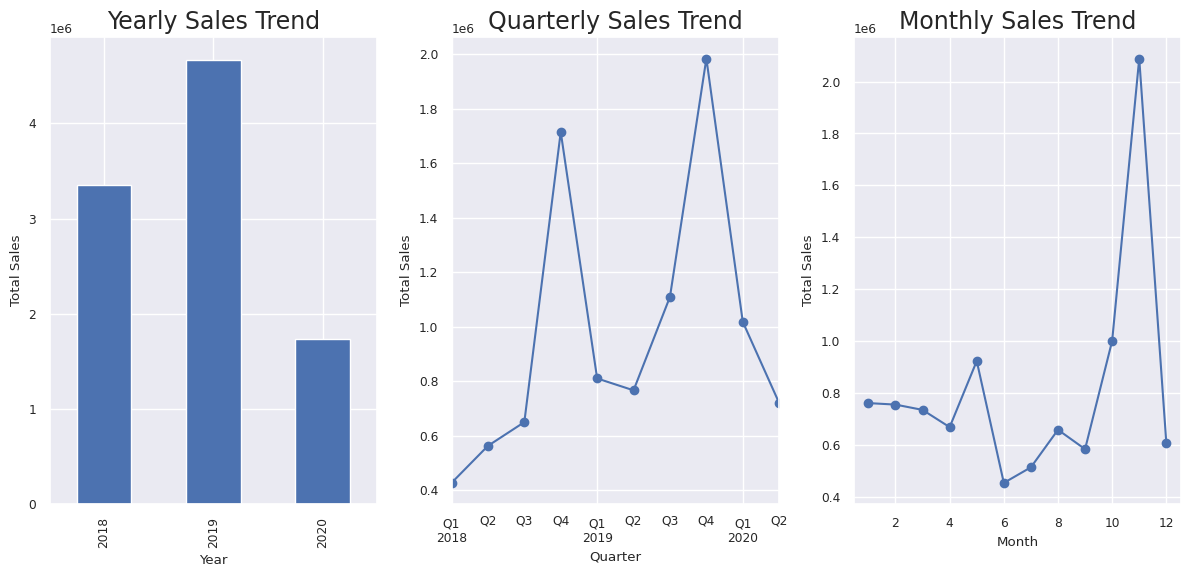

In [20]:
# Convert ORDERDATE to datetime
df_salesdata['ORDERDATE'] = pd.to_datetime(df_salesdata['ORDERDATE'])

# Create additional time-based columns
df_salesdata['Year'] = df_salesdata['ORDERDATE'].dt.year
df_salesdata['Month'] = df_salesdata['ORDERDATE'].dt.month
df_salesdata['Quarter'] = df_salesdata['ORDERDATE'].dt.to_period('Q')

# Aggregate sales by Year and Quarter for time-series analysis
sales_trend_year = df_salesdata.groupby('Year')['SALES'].sum()
sales_trend_quarter = df_salesdata.groupby('Quarter')['SALES'].sum()
sales_trend_month = df_salesdata.groupby('Month')['SALES'].sum()

# Plotting the trends
plt.subplot(1, 3, 1)
sales_trend_year.plot(kind='bar')
plt.title('Yearly Sales Trend', fontsize=17)
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
sales_trend_quarter.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend', fontsize=17)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 3)
sales_trend_month.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend', fontsize=17)
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

**Observations:**
* Sales show increasing trend from 2018 to 2019. Lower Sales in 2020 appears to be due to limited data availability.
* Sales or customer activity shows a clear seasonality, with highest sales in November, likely corresponding to industry-specific high-demand periods or holiday seasons.
* Months June to September exhibit consistently lower activity, which may indicate off-peak periods where targeted promotions or discounts could boost sales.


### Bivariate Analysis - Customer Related

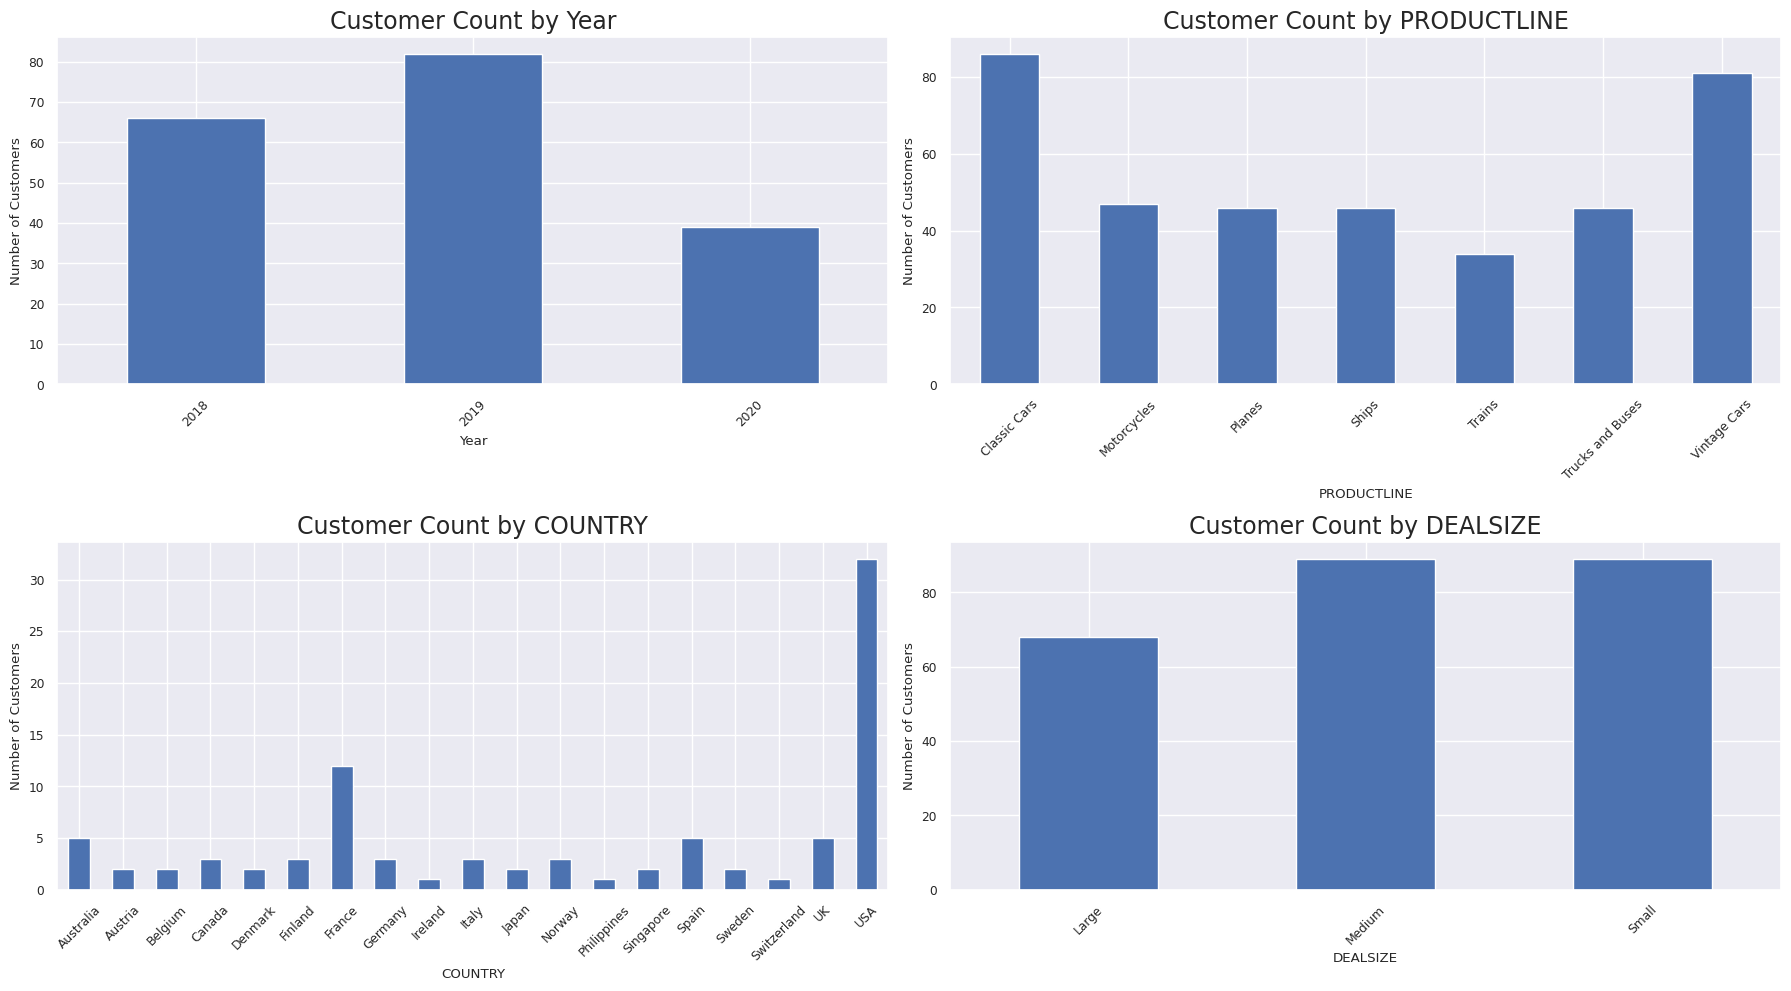

In [21]:
# Display Customer Count by selected parameters
columns_to_plot = ['Year', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE',]
plot_customer_counts(df_salesdata, columns_to_plot)

**Observations:**
* Customer count has steadily increased from 2018 tol 2019, indicating successful customer acquisition.
* The USA leads in customer count, underscoring its significance as the primary market.
* Classic Cars has the highest customer count, aligning with its sales dominance.
* Medium deal sizes attract the most customers, indicating a preference for moderate-sized purchases.

### EDA Summary and Key Findings:
Key Findings:

**Customer Behavior:**

* Significant gaps in Days Since Last Order indicate potential churn risks, especially for customers with long periods between purchases.
* Classic Cars and Vintage Cars are the highest revenue-generating product lines, while others like Trains serve niche markets.
* Large deals contribute disproportionately to sales, though Medium deals are more frequent, highlighting the importance of balancing high-value transactions with volume.

**Time Series Analysis:**

* Year-over-year growth is observed, indicating successful customer acquisition and market penetration.
* Sales show clear seasonality, with specific months peaking, likely due to industry trends or holiday seasons, guiding future promotional strategies.

**Geographical Insights:**

* The USA is the dominant market, with significant sales and customer counts, followed by key European markets like Germany and France.
* Potential for growth in underrepresented regions, as identified by customer count and sales distribution.

**Deal Size and Sales:**

* High variability within Large deals suggests the importance of targeted strategies for these customers.
* Medium deal sizes are most common, but Small deals, while lower in volume, contribute consistently to sales.

**RFM Analysis**
* Using the insights gathered from EDA we will continue to do the RFM analysis using KNIME.

**Data Filtering:**

For RFM Analysis we will include data with Shipped, Resolved, and In Process statuses because they represent completed or actively progressing orders, reflecting actual customer behavior. Other statuses like Cancelled or On Hold were excluded as they do not contribute to meaningful sales or customer engagement analysis.
